In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
u_file_path = r"C:\Users\leroquan\Documents\00-Work_space\08-Field trip Vidy baye\forecasts\binary_data_forecast_of_2024-09-21\u10.bin"
v_file_path = r"C:\Users\leroquan\Documents\00-Work_space\08-Field trip Vidy baye\forecasts\binary_data_forecast_of_2024-09-21\v10.bin"

In [16]:
with open(u_file_path, 'rb') as fid:
    u = np.fromfile(fid, dtype='<f8')
with open(v_file_path, 'rb') as fid:
    v = np.fromfile(fid, dtype='<f8')

In [17]:
from datetime import datetime, timedelta

# Define the start and end dates
start_date = datetime(2024, 9, 21)
end_date = datetime(2024, 9, 25, 23, 59)  # Include the last hour of the 25th

# Generate the list of hourly dates
date_list = []
current_date = start_date

while current_date <= end_date:
    date_list.append(current_date.strftime('%d.%m.%Y %H:%M'))
    current_date += timedelta(hours=1)

In [19]:
u_array = np.reshape(u, (121,int(528),int(1344)))
v_array = np.reshape(v, (121,int(528),int(1344)))
speed_intensity = np.sqrt(np.square(u_array) + np.square(v_array))

In [31]:
u2_file_path = r"C:\Users\leroquan\Documents\00-Work_space\08-Field trip Vidy baye\forecasts\binary_data_forecast_of_2024-09-23\u10.bin"
v2_file_path = r"C:\Users\leroquan\Documents\00-Work_space\08-Field trip Vidy baye\forecasts\binary_data_forecast_of_2024-09-23\v10.bin"

In [32]:
with open(u2_file_path, 'rb') as fid:
    u2 = np.fromfile(fid, dtype='<f8')
with open(v2_file_path, 'rb') as fid:
    v2 = np.fromfile(fid, dtype='<f8')

In [33]:
from datetime import datetime, timedelta

# Define the start and end dates
start_date2 = datetime(2024, 9, 23)
end_date2 = datetime(2024, 9, 25, 23, 59)  # Include the last hour of the 25th

# Generate the list of hourly dates
date_list2 = []
current_date = start_date2

while current_date <= end_date2:
    date_list2.append(current_date.strftime('%d.%m.%Y %H:%M'))
    current_date += timedelta(hours=1)

In [38]:
u2_array = np.reshape(u2, (121,int(528),int(1344)))
v2_array = np.reshape(v2, (121,int(528),int(1344)))
speed_intensity2 = np.sqrt(np.square(u2_array) + np.square(v2_array))

In [79]:
print(speed_intensity[84,:,:].max())
print(speed_intensity2[36,:,:].max())

6.095817856782256
7.970747242971047


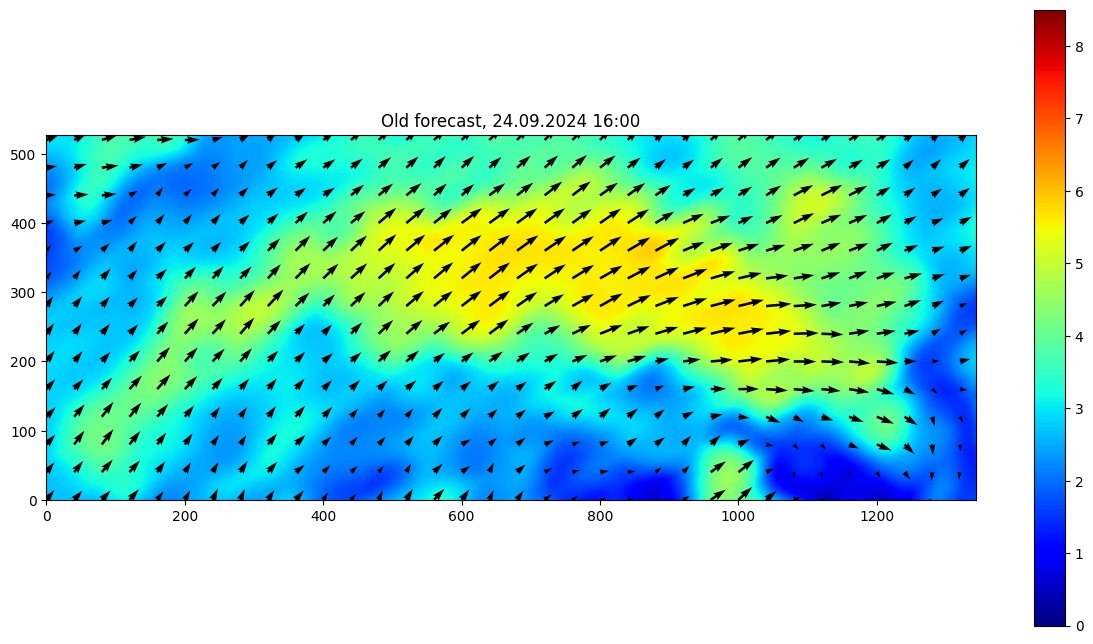

In [87]:
i_time = 88
subsetting_factor = 40
fig = plt.figure(figsize=(15,8))
plt.quiver(
    range(1344)[::subsetting_factor], 
    range(528)[::subsetting_factor], 
    u_array[i_time][::subsetting_factor,::subsetting_factor], 
    v_array[i_time][::subsetting_factor,::subsetting_factor],
    scale= 200)
plt.imshow(speed_intensity[i_time,:,:], vmin=0, vmax=8.5, cmap='jet')
plt.gca().invert_yaxis()
plt.title('Old forecast, ' + date_list[i_time])
plt.colorbar()

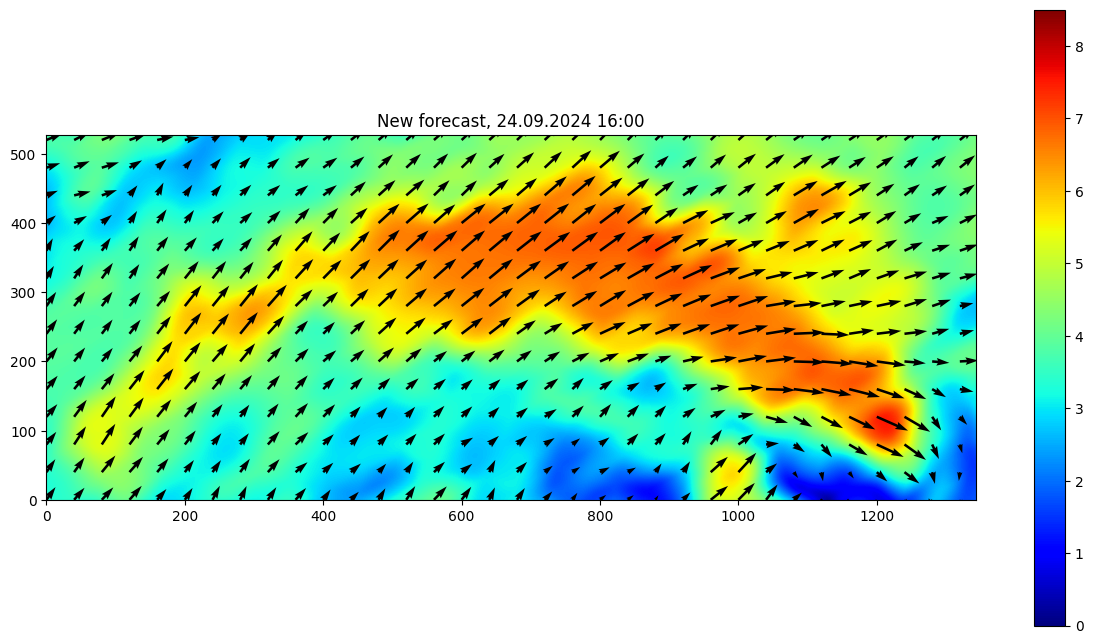

In [86]:
i_time = 40
subsetting_factor = 40
fig = plt.figure(figsize=(15,8))
plt.title('New forecast, ' + date_list2[i_time])
plt.quiver(
    range(1344)[::subsetting_factor], 
    range(528)[::subsetting_factor], 
    u2_array[i_time][::subsetting_factor,::subsetting_factor], 
    v2_array[i_time][::subsetting_factor,::subsetting_factor],
    scale= 200)
plt.imshow(speed_intensity2[i_time,:,:], vmin=0, vmax=8.5, cmap='jet')
plt.gca().invert_yaxis()
plt.colorbar()

In [47]:
v2_array[i_time]

array([[ 1.88998282,  1.87524053,  1.86051803, ..., -0.74452708,
        -0.72009454, -0.69520078],
       [ 1.88798272,  1.87346146,  1.85896467, ..., -0.76337721,
        -0.73846297, -0.71308291],
       [ 1.8862887 ,  1.87199883,  1.85773812, ..., -0.78072484,
        -0.75536768, -0.72954013],
       ...,
       [ 1.74629993,  1.75210175,  1.75709157, ...,  3.04953272,
         3.05580174,  3.06194304],
       [ 1.76675611,  1.77258884,  1.77759009, ...,  3.04833613,
         3.05458084,  3.06070882],
       [ 1.78695719,  1.79282609,  1.79784844, ...,  3.04723536,
         3.0534508 ,  3.05955943]])